In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
from dynadojo.systems import LDSSystem
from dynadojo.baselines import LinearRegression, DNN
from dynadojo.challenges import FixedComplexity
import pandas as pd

In [15]:
challenge = FixedComplexity(
    N=[10, 100, 1000],
    l=3,
    e=3,
    t=50,
    control_horizons=0,
    max_control_cost_per_dim=0,
    system_cls=LDSSystem,
    reps=10,
    test_examples=50,
    test_timesteps=50,
)
data1 = challenge.evaluate(LinearRegression, id="linear regression")
data2 = challenge.evaluate(DNN, model_kwargs={"activation": "relu"}, fit_kwargs={"epochs": 20}, id="nonlinear network")
data3 = challenge.evaluate(DNN, fit_kwargs={"epochs": 20}, id="linear network")

n=10, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=3, id='linear regression'
n=100, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=3, id='linear regression'
n=1000, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=3, id='linear regression'
n=10, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=7, id='linear regression'
n=100, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=7, id='linear regression'
n=1000, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=7, id='linear regression'
n=10, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=3, id='nonlinear network'
n=100, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=3, id='nonlinear network'
n=1000, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=3, id='nonlinear network'
n=10, latent_dim=3, embed_dim=3, timesteps=50, control_horizons=0,  rep_id=5, id='

In [16]:
data = pd.concat((data1, data2, data3))
data.head()

,rep,n,latent_dim,embed_dim,timesteps,control_horizons,loss,total_cost,id
0,0,10,3,3,50,0,2.892785e-07,0,linear regression
1,0,100,3,3,50,0,2.934564e-07,0,linear regression
2,0,1000,3,3,50,0,2.554842e-07,0,linear regression
0,1,10,3,3,50,0,6.903821e-07,0,linear regression
1,1,100,3,3,50,0,6.808943e-07,0,linear regression


<Figure size 640x480 with 0 Axes>

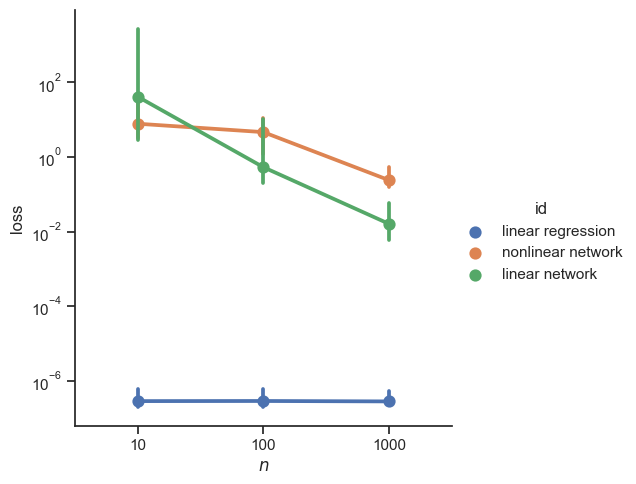

In [17]:
challenge.plot(data)